In [4]:
#import libraries
import pandas as pd
import numpy as np
from datascience import *
import seaborn as sns
import matplotlib.pyplot as plt
from graphviz import Digraph 
from graphviz import Source
from IPython.display import Image
%matplotlib inline
plt.style.use("fivethirtyeight")

# Infodemiology: Examining Food Insecurity in the United States with Google Trends APIs during the COVID-19 Pandemic
By Abraham Niu, Hailey Park, Chelsea Mai, Felicia Liu, and Dr. Barbara Laraia

<img src="images/foodbank-Copy1.png" width="30%">

### Background  <a id='section-2'>


Food insecurity is defined by the U.S. Department of Agriculture as the lack of consistent access to enough food for an active, healthy life (1). The COVID-19 pandemic has exacerbated food insecurity nationwide, and over 20% of Feeding America's 200 food banks were in danger of running out of food in March of 2020 (2). In October of 2020, Feeding America predicted the national food insecurity rate to increase from 10.5% in 2019 to 15.6% in 2020 (3). 

Prior to the pandemic, Hispanic, Black, and single mother-led households already disproportionately faced food insecurity rates higher than the nationwide rate. The rate for Hispanic households was 15.6%, 19.1% for Black households, and 28.7% for single mother-led households (4). However, the pandemic aggravated these rates through shifts in food shopping habits ('food hoarding'), reduced public transportation, income insecurity, and the continued presence of food deserts (5). States had a patchwork response to food insecurity and expanding P-EBT benefits, where individual states were allowed to increase Supplemental Nutrition Assistance Program (SNAP) allotments up to the maximum benefit amount as an emergency measure (6). Congress’ Families First Coronavirus Act (FFCA) further enabled states to issue P-EBT for households with children eligible to receive free or reduced-price school meals. State and local differences in responses were thus evident.



### Research Questions <a id='section-3'>


We will be utilizing the Google Trends API to answer the following questions:

1. What are key search queries used to search on Google for food insecurity topics during 2020?

2. How does food insecurity search behavior on Google in 2020 differ across U.S. states between January 1 and December 31?
 
3. What state-level contextual and food systems-related factors are associated with state-level differences in search volumes for key food security queries?   

### Methodology <a id='section-4'>


We used the Google Trends website data to assess key search queries as proxies for food insecurity during the calendar year January 1, 2020 to December 30, 2020 in the US. To identify key terminology that captured consumer searches to combat food insecurity, we began with the names of the major federal food programs, 'food stamps', 'SNAP', 'EBT', 'WIC' (8). In addition to the four federal food program terms, we used general queries related to accessing nutrition resources that we found in the literature (9). We identified eight queries: 'emergency food', 'free food', 'free meal', 'food assistance', 'food banks', 'food coupons', 'food shortage', and 'SNAP food' (9).   

A key characteristic of the Google Trends Application Programming Interface (API) is that it does not display the true underlying Relative Search Volume (RSV), the relative popularity index of a query calculated using the ratio of a query’s search volume to the sum of the search volumes of all possible queries in a given region and time period, of an initial search term. Rather, it takes a small sample of its total search data each day and provides the RSV of the term in that particular sample. To account for sample variability, we took the average of thirty samples of RSV across all 50 states in 2020 for our initial search queries and our control term 'France'. 

To reduce our key search queries, we utilized the Compare Function within Google Trends. This allows users to compare RSV across different queries. However, a limitation with its design is that users cannot compare more than 5 queries at a time.

Since searches are scaled to the highest volume topic in a query, two different queries aren’t comparable if they do not have the same largest topic. Resolving this problem, we employed a control term ( 'France') that we used as a constant in multiple groups of comparisons (7). Although this term was arbitrarily selected, it particularly has a large, stabilized interest over time, making it a good fit to serve as a control term for our comparison of 11 queries (11). We assessed four food insecurity-related queries simultaneously against the control term for the full 2020 year across the United States to determine which queries were most searched during this time period. For the search queries identified with the greatest RSV compared to 'France', we collected RSV over 30 days for each of the 50 states and used mean state RSV values as the dependent variable. We also derived additional temporal variables that captured peak search behavior. We took five samples of search volume data for the key terms and used the API’s time-series data to estimate the weeks since January 1st, 2020 until the highest search volume data for the initial search term occurred. Tertiles (e.g., categorizing states into Low, Moderate, or High RSV) were created for each dependent variable.

We identified 12 independent variables from  external datasets (e.g., USDA, Census, etc.) as potential predictors of our key search queries' RSV. These were measures of state demographic (population, % rural, % immigrant, ethnicity ratio), economic (% poverty, median income, income disparity ratio), food security (2019 food security prevalence), food assistance participation (% SNAP and school lunch) and low supermarket access. One additional variable, % unemployment, was measured in July 2020. With the exception of %-unemployment, we only chose variables that were measured prior to 2020 to maintain temporality between our predictors and dependent variables. 

We performed analysis of variance (ANOVA) F-tests to compare the difference in means among the tertiles for each independent variable. Independent variables that met statistical significance at p-value<0.05 for each outcome, were assessed in a multinomial logistic regression analysis to examine relationships between our hypothesized predictors and high compared to low tertiles of search behavior of the food insecurity terms.

### Delving into The Data <a id='section-5'>

We used Google search data for the calendar year of 2020 to conduct the following research. The Google Trends website provides state-level RSV values for each key search term that you input. In addition, you can also obtain time-series data (granular at the weekly level) for the search terms that you specify.    
    
Let's start by observing search volume data for each of our terms ('food stamps', 'EBT', 'WIC', 'emergency food', 'free food', 'free meal', 'food assistance', 'food banks', 'food coupons', 'food shortage', and 'SNAP food') compared to our control 'france' to reduce our original set of initial search terms.
    
This data was all downloaded via the Google Trends Website via the Compare function (over full year of 2020, in all of U.S)

In [5]:
#Upload data
compare_a = pd.read_csv("data/compare1.csv", header=1)
compare_b = pd.read_csv("data/compare2.csv", header=1)
compare_c = pd.read_csv("data/compare3.csv", header=1)

Let's see what the files look like:

In [7]:
compare_a.head()

,Week,free food: (United States),free meal: (United States),snap food: (United States),france: (United States)
0,2020-01-05,11,3,1,70
1,2020-01-12,10,2,1,65
2,2020-01-19,12,2,1,62
3,2020-01-26,12,2,1,63
4,2020-02-02,11,2,1,62


In [8]:
compare_b.head()

,Week,france: (United States),WIC: (United States),food shortage: (United States),food coupons: (United States),food banks: (United States)
0,2020-01-05,66,21,<1,2,2
1,2020-01-12,65,18,<1,2,1
2,2020-01-19,66,19,<1,2,2
3,2020-01-26,63,18,<1,2,2
4,2020-02-02,65,19,<1,2,1


In [9]:
compare_c.head()

,Week,france: (United States),food stamps: (United States),EBT: (United States),food assistance: (United States),emergency food: (United States)
0,2020-01-05,66,17,13,1,1
1,2020-01-12,65,15,12,1,1
2,2020-01-19,66,13,9,1,1
3,2020-01-26,63,14,9,1,1
4,2020-02-02,65,15,13,1,1


Notice that some data types are inconsistent (e.g "<1" instead of a number). Let's reformat and also clean up the columns to make it easier to read.

In [10]:
compare_a = compare_a.replace("<1", 0)
compare_a = compare_a.rename({'france: (United States)': "france", "free food: (United States)": 'free food', 'free meal: (United States)': 'free meal', 'snap food: (United States)': 'snap food'}, axis=1)
compare_a.head()

,Week,free food,free meal,snap food,france
0,2020-01-05,11,3,1,70
1,2020-01-12,10,2,1,65
2,2020-01-19,12,2,1,62
3,2020-01-26,12,2,1,63
4,2020-02-02,11,2,1,62


In [11]:
compare_b = compare_b.replace("<1", 0)
compare_b = compare_b.rename({'france: (United States)': "france", "WIC: (United States)": 'WIC', 'food shortage: (United States)': 'food shortage', 'food coupons: (United States)': 'food coupons', 'food banks: (United States)': 'food banks'}, axis=1)
compare_b['food shortage']=compare_b['food shortage'].astype(float)
compare_b.head()

,Week,france,WIC,food shortage,food coupons,food banks
0,2020-01-05,66,21,0.0,2,2
1,2020-01-12,65,18,0.0,2,1
2,2020-01-19,66,19,0.0,2,2
3,2020-01-26,63,18,0.0,2,2
4,2020-02-02,65,19,0.0,2,1


In [12]:
compare_c = compare_c.replace("<1", 0)
compare_c = compare_c.rename({'france: (United States)': "france", "food stamps: (United States)": 'food stamps', 'EBT: (United States)': 'EBT', 'food assistance: (United States)': 'food assistance', 'emergency food: (United States)': 'emergency food'}, axis=1)
compare_c.head()

,Week,france,food stamps,EBT,food assistance,emergency food
0,2020-01-05,66,17,13,1,1
1,2020-01-12,65,15,12,1,1
2,2020-01-19,66,13,9,1,1
3,2020-01-26,63,14,9,1,1
4,2020-02-02,65,15,13,1,1


In [13]:
#Reformat data columns to make visualizations easier to interpret. 
temp_free = compare_a['free food']
temp_emerg = compare_c['emergency food']
temp_Wic = compare_b['WIC']
temp_ass = compare_c['food assistance']
compare_a['emergency food'] = temp_emerg
compare_b['food assistance'] = temp_ass
compare_c['WIC'] = temp_Wic
compare_c['free food'] = temp_free


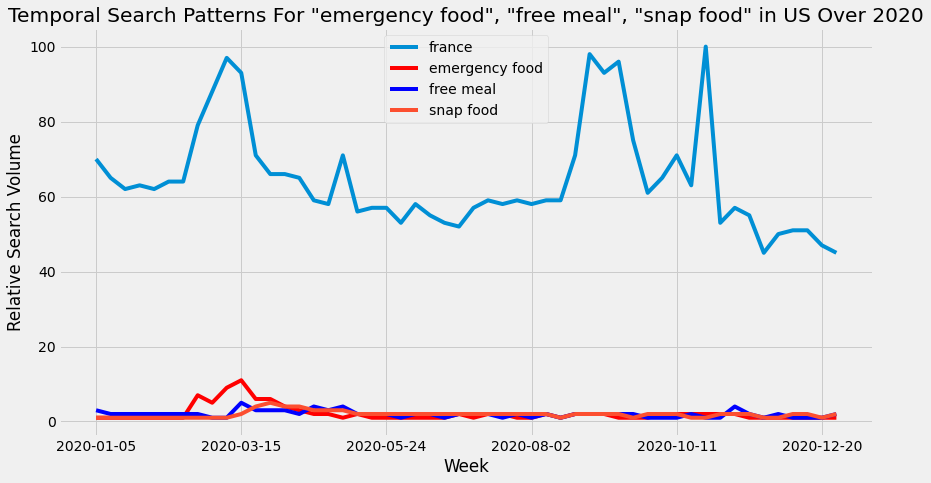

In [23]:
#Plot the data
plt.figure(figsize =(13, 7))
ax = plt.gca(title='Temporal Search Patterns For "emergency food", "free meal", "snap food" in US Over 2020', xlabel='Date', ylabel='Relative Search Volume')


compare_a.plot(kind='line',x='Week',y='france',ax=ax)
compare_a.plot(kind='line',x='Week',y='emergency food', color='red', ax=ax)
compare_a.plot(kind='line',x='Week',y='free meal', color='blue', ax=ax)
compare_a.plot(kind='line',x='Week',y='snap food', ax=ax)


plt.show()

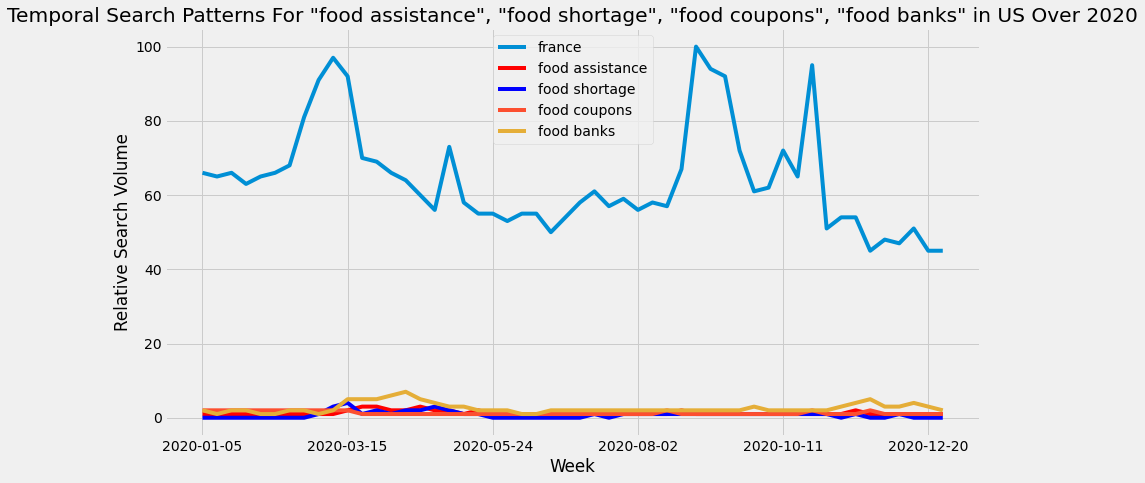

In [24]:
plt.figure(figsize =(13, 7))
ax = plt.gca(title='Temporal Search Patterns For "food assistance", "food shortage", "food coupons", "food banks" in US Over 2020', xlabel='Date', ylabel='Relative Search Volume')

compare_b.plot(kind='line',x='Week',y='france',ax=ax)
compare_b.plot(kind='line',x='Week',y='food assistance', color='red', ax=ax)
compare_b.plot(kind='line',x='Week',y='food shortage', color='blue', ax=ax)
compare_b.plot(kind='line',x='Week',y='food coupons', ax=ax)
compare_b.plot(kind='line',x='Week',y='food banks', ax=ax)

plt.show()


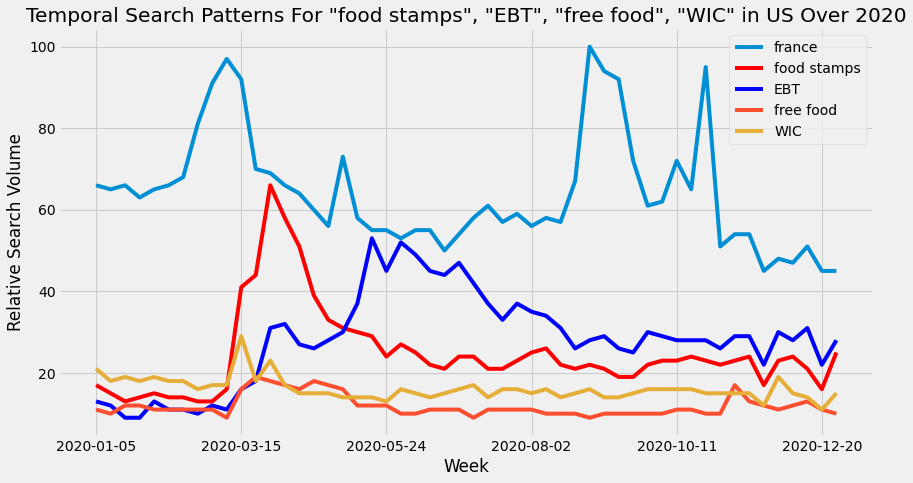

In [25]:
plt.figure(figsize =(13, 7))
ax = plt.gca(title='Temporal Search Patterns For "food stamps", "EBT", "free food", "WIC" in US Over 2020', xlabel='Date', ylabel='Relative Search Volume')


compare_c.plot(kind='line',x='Week',y='france',ax=ax)
compare_c.plot(kind='line',x='Week',y='food stamps', color='red', ax=ax)
compare_c.plot(kind='line',x='Week',y='EBT', color='blue', ax=ax)
compare_c.plot(kind='line',x='Week',y='free food', ax=ax)
compare_c.plot(kind='line',x='Week',y='WIC', ax=ax)

plt.show()

Observe the three plots above for a second. What do you see?

These results showed that 'food stamps' and 'EBT' were the most searched terms compared to the constant term 'France'. In addition, the terms 'food stamps' and 'EBT' had related queries that demonstrated consumer search phrases that captured food insecurity. With consideration to COVID-19's economic impact, 'food stamps' related queries implied that newly food insecure consumers were looking for information about how to access or apply for the program. Following the expansion of P-EBT in June 2020, spikes in 'EBT' related queries implied that consumers were looking for information about how to use the electronic benefit card online, in stores, and other related logistics (9). The nine other search queries resulted in RSV close to a zero value with no peak search period. 

As such, we continued our investigation with 'food stamps' and 'EBT' as our search terms.

### Further Visualization <a id='section-5'>

The RSVs for 'food stamps' and 'EBT' are averaged over 30 daily samples to account for sample variability. The histogram of the peak time differences between these search terms are averaged over 5 daily samples. These samples were pulled between March and April of 2021. 
    
After collecting the 30 daily samples of the state RSVs for ‘EBT’ and ‘food stamps’, averages were taken. Then, we produced histograms of the mean state RSVs below in STATA:

<img src="images/histograms.png" width="70%">

We also collected 5 daily samples, marking the number of weeks from January 1st, 2020 to the peak search volume for ‘EBT’ and ‘food stamps’ for each state. Then, we produced histograms below in STATA:

<img src="images/histograms2.png" width="70%">

The histogram presents the time difference between the 'food stamps' and 'EBT' peak RSVs for each state. The mean time difference is 11.3 weeks, suggesting that states average 11.3 weeks from when citizens exhibit the need for food assistance and when they are able to access it. However, the range is from -9.4 weeks to 29.2 weeks, meaning that the time difference is highly state-dependent and possibly dependent on numerous factors (e.g., state patchwork response, socioeconomic variables, etc.).

In addition to this, we used Tableau to examine the geographical distributions of 'food stamps' and 'EBT' tertiles in 2020, which are presented in the figure below. We found that there seems to be a strong amount of geographical clustering in tertiles, especially in the northern and southwestern regions of the US. Furthermore, there is a lot of state overlap in the tertile rankings from 'food stamps' and 'EBT', representing an association between information seeking and usage of food stamps.

<img src="images/Dashboard 1.png" width="70%">

<img src="images/Dashboard 2.png" width="70%">

### Regression Analysis <a id='section-6'>
Now that we understand the dependent variables better, we compile a large dataset of independent variables that we can use in our regression analysis.

Our regression datasets consisted of 12 independent variables pulled from sources like the Census Bureau, USDA, and the Reinvestment Fund, which included measures of state demographics (total population, percent rural, percent immigrant, ethnicity ratio), economic (percent poverty, median income, income disparity ratio), food security (2019 food security prevalence), food assistance participation (percent SNAP enrollment and school lunch) and low supermarket access. You can find our fully compiled data as well as its descriptions and more information regarding its sources [here](https://docs.google.com/spreadsheets/d/187myE-Qhvlkgy76zyKc6pz0kyG8vVWiib8XlxR-RnhM/edit#gid=1014976912) 

With the exception of percent unemployment, which was measured in July 2020, we only chose variables that were measured prior to 2020 to maintain temporality between our predictors and dependent variables. Using this regression dataset, we employed analysis of variance (ANOVA) F-tests and multinomial logistic regression to compare the difference in means among the tertiles for each independent variable and examine relationships between our hypothesized predictors and high compared to low tertiles of search behavior of the food insecurity terms.

<img src="images/correlation_matrix.png">

From our regression datasets, we created a Pearson’s correlation matrix in Google Sheets. This matrix allowed us to examine how pre-existing socioeconomic disparities and food access barriers, in combination with U.S. state-level policy responses to COVID-19, exacerbated food insecurity rates during the pandemic. 

#### Independent Variable Selection through Bivariate ANOVA Analyses <a id='section-6'> 

A limitation with our data is that we have too many independent variables (12) relative to the number of states (50) for every dependent variable. This leads to issues with running regression analyses because they are unable to extract meaningful results when there are too many independent variables in use. Therefore, we need to cut down the number of independent variables. In order to identify which independent variables are statistically significant enough to be used for the regression analyses, we must conduct a one-by-one bivariate analyses. Essentially, we need to perform an analysis of variance (ANOVA) F-test to compare the difference in means among the tertiles for each of the 12 independent variables. This analysis was conducted in STATA. 

CODE EXAMPLE: . oneway foodinsecureprecovid ebt_rvs_ave_tert, b
    
The oneway command in STATA performs a one-way analysis-of-variance (ANOVA) model and performs multiple comparison tests. The 'foodinsecureprecovid' term represents the independent variable (e.g., Food Insecure Pre-COVID), and the 'ebt_rvs_ave_tert' term represents the dependent variable (e.g., ‘EBT’ Mean RSV). An example of the output is shown below:  



<img src="images/reg1.png">

The table titled ‘Comparison of % food insecure pre-COVID by 1=low, 2=med, 3=high’ provides mean differences between each tertile group, and a corresponding p-value. The highlighted cells indicate that the p-values are below 0.05, meaning that the association between the independent variable and dependent variables (in this case, food insecure pre-COVID and ‘EBT’ mean RSVs) is significant.


Here are resources to do similar analyses in Python if you are curious: 

https://www.reneshbedre.com/blog/anova.html

https://www.statsmodels.org/stable/index.html



#### Multinomial Logistic Regression  <a id='section-6'> 
    
Independent variables that met statistical significance at p-value<0.05 for each outcome from the bivariate analyses, were assessed in a multinomial logistic regression analysis to examine relationships between our hypothesized predictors and tertiles (low, moderate, high) of search behavior of the food insecurity terms. This analysis was done in STATA.

CODE EXAMPLE: . mlogit ebt_rvs_ave_tert total_pop_1000 studentseligibleforfreereducedpr foodinsecureprecovid financial_distress median_income percent_poverty, rrr nolog base(1)
                                                                        
The mlogit command in STATA runs the multinomial logistic regression analysis. The 'ebt_rvs_ave_tert' term represents the dependent variable (e.g., ‘EBT’ Mean RSV). The 'total_pop_1000 studentseligibleforfreereducedpr foodinsecureprecovid financial_distress median_income percent_poverty' terms represent the list of statistically significant independent variables that were identified from the bivariate analyses. The rrr command produces results as a Relative Risk Ratio. An example of the output is shown below: 


<img src="images/reg2.png" width="60%"> 

The highlighted cells represent which independent variables (e.g., students eligible for free/reduced lunch, percent poverty) were significantly associated with the dependent variable from the multinomial logistic regression. 

Here are resources to do similar analyses in Python: 

https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


The table below shows the tertile means from the analysis of variance between the independent variables and each outcome. The highlighted cells in the table are the independent variables that were identified (p-val 0.05) associated with three of the dependent variables. Percent food-insecure pre-COVID, % eligibility for free/reduced lunch, median income, and % poverty were each associated with both 'food stamp' and 'EBT' RSV. The term % unemployment rate, % rural, % eligibility for free/reduced lunch, and total population were associated with weeks to 'food stamps' peak. The dependent variables weeks to 'EBT' peak RSV and the difference between weeks to 'food stamps' and 'EBT' peak RSV were not associated with any independent variables. Surprisingly, the independent variables % immigrant, % SNAP enrolled, ethnic disparity ratio, income disparity ratio and limited supermarket access were not associated with any dependent variable. 

<img src="images/table1.png" width="80%"> 

### Discussion <a id='section-6'>

Our findings are in agreement with a study by Mayasari et. al., who found that COVID-19 has had profound effects on food insecurity for most vulnerable populations, as shown by the high and sustained RSV for federal food assistance-related terms across all 50 states for the entire year (9). RSV curves illustrated peaks in search interest for those food-insecurity related key words at the beginning of the COVID-19 lockdown in March 2020.

Additionally, it is evident that pre-existing state-level socioeconomic and food insecurity-related indicators were the most robust of the high search volume that was seen. Using USDA Census Data from 2017-2019, the percent of people in poverty within each state ranges from 5.6-19.0%, indicating that some states have 4 times the proportion of their population living within poverty in comparison to others (12). Looking at Table 1, these disparities in state-level poverty are seen to be significantly associate with the mean RSVs of "food stamps" and "EBT." In combination with a patchwork state policy response to COVID-19, these pre-existing disparities can influence the time between the RSV peaks for our key search terms, leading to increased delays in accessing food assistance (11). 

One research limitation is our tertile approach for the dependent variables. Because we are not comparing all 50 states individually, there is the potential to lose out on information about state-level differences in COVID-19 policy responses. However, this approach allows us to avoid the assumption that search term RSVs are a continuous variable during our statistical analyses. In addition, another data hurdle was the small sample size (50 states) relative to the number of independent variables (3). 

### Conclusions <a id='section-6'>
1. Future directions for policy would emphasize socioeconomic inequities as a major indicator for challenges to accessing nutrition, especially in periods of acute national distress
    
2. Our data illustrate the need for states to provide comprehensive, increased awareness of resources and quicker implementation as seen by the visible difference in peaks
    
3. There are strong correlations between pre-existing disparities, state patchwork responses, and rising food insecurity rates that must be combatted 

### References <a id='section-6'>

1. Alisha Coleman-Jensen, Rabbitt, M. P., Gregory, C. A. & Singh, A. Household Food Security in the United States in 2019. www.ers.usda.gov (2020).	

2. Cohen, S. Millions of hungry Americans turn to food banks for the 1st time. The Associated Press (2020).

3. Hake, M. et al. The Impact of the Coronavirus on Food Insecurity in 2020. (2020).

4. Morales, D. X., Morales, S. A. & Beltran, T. F. Racial/Ethnic Disparities in Household Food Insecurity During the COVID-19 Pandemic: a Nationally Representative Study. J. Racial Ethn. Health Disparities (2020) doi:10.1007/s40615-020-00892-7.

5. Hester, J. L. How Grocery Taxes Hurt Poor Americans. Bloomberg (2016).

6. Lane, H. G., Turner, L., Dunn, C. G., Hager, E. R. & Fleischhacker, S. Leveraging Implementation Science in the Public Health Response to COVID-19 : Child Food Insecurity and Federal Nutrition Assistance Programs. Public Health Rep. Wash. DC 1974 135, 728–736 (2020).

7. Fowle, Carrie. “Using Google Trends at Scale.” Medium, Towards Data Science, 28 May 2020, towardsdatascience.com/using-google-trends-at-scale-1c8b902b6bfa.

8. Keith-Jennings, B., Llobrera, J. & Dean, S. Links of the Supplemental Nutrition Assistance Program With Food Insecurity, Poverty, and Health: Evidence and Potential. Am. J. Public Health 109, 1636–1640 (2019).

9. Hake, M. et al. The Impact of the Coronavirus on Food Insecurity in 2020. (2020).

10. Mayasari, N. R. et al. Impacts of the COVID-19 Pandemic on Food Security and Diet-Related Lifestyle Behaviors: An Analytical Study of Google Trends-Based Query Volumes. Nutrients 12, 3103 (2020).

11. Kinsey, E. W., Kinsey, D. & Rundle, A. G. COVID-19 and Food Insecurity: an Uneven Patchwork of Responses. J. Urban Health 97, 332–335 (2020).

12. Fox, L. (2020). Current Population Reports. The Supplemental Poverty Measure: 2019. U.S. Census Bureau. www.census.gov.
